In [1]:
import os
import copy
import pickle
import numpy as np
import glob

# matplotlib
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# astropy
from astropy.io import fits
from astropy.nddata import Cutout2D
from astropy.utils.data import download_file
from astropy.coordinates import SkyCoord, Angle
from astropy import wcs
from astropy.table import Table,vstack
import astropy.units as u
import matplotlib.pyplot as plt 


import sys
# so can find module one dir back; don't need to explicitly put .py into each subfolder 
sys.path.append("../..")
from candels_galaxy_surveys import galaxy_catalog,galaxy_survey
import update_galaxy_survey

# so can find script for host ellipses 
sys.path.append("../../visualize_hosts/")
from sn_cutout import ellipse

In [2]:
candels = pickle.load(open('delz_candels.pkl','rb'))

In [3]:
GND13Sto = candels[-2]

nearby = GND13Sto[1][1]
host = GND13Sto[1][2]
lc = GND13Sto[1][3]

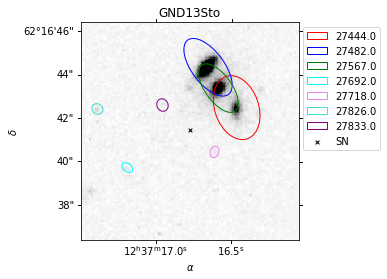

In [4]:
nick = GND13Sto[1][0]['name'] 
# the SN skycoord location
sn_loc = SkyCoord(GND13Sto[1][0]['RA'],GND13Sto[1][0]['DEC'],unit = (u.hourangle,u.deg))


# updating the surveys
update_near = update_galaxy_survey.update_survey(nearby)
update_host = update_galaxy_survey.update_survey(host[0])

# renaming for clarity
nearby = update_near
host = [update_host,host[1],host[2]]

# getting list of the ids, elliptical parameters for each nearby for this SN
ids = [i for i in nearby.mass[nearby.ids]]
nearby_coords = [i for i in nearby.gal_skycoords()]
a_ellipse = [np.float(i) for i in nearby.photom[nearby.a_ellip]]
b_ellipse = [np.float(i) for i in nearby.photom[nearby.b_ellip]]
theta_ellipse = [np.float(i) for i in nearby.photom[nearby.theta_ellip]]
gal_sources = [nearby.source]*len(nearby.photom)

# 5 element list, each element another x element list for a given SN with the x candidate parameters.
possible_hosts = [nearby_coords, a_ellipse, b_ellipse, theta_ellipse,ids,gal_sources]

# the ellipse 2nd argument wants a list with the x candidate parameters all together 
# ie not [[all coords], [all a], [all b], [all theta]] rather [[coords,a,b,theta],...]
possible_hosts = list(zip(possible_hosts[0],possible_hosts[1],possible_hosts[2],possible_hosts[3],possible_hosts[4],possible_hosts[5]))

ellipse(nick.lower()+'10x10.fits',possible_hosts,sn_loc,title=nick,save=False,show=True,diverging=False,logscale=False,val_min = -.012,val_max = .15 )

In [6]:
from astropy.table import hstack
hstack([nearby.mass[nearby.ids,nearby.redshift_names],nearby.physpar[nearby.zspec,nearby.zphot,nearby.dz_l95,nearby.dz_u95]])

id,z,z_spec,z_peak,l95,u95
str8,str8,str12,str12,str12,str12
27444,1.0700,-1.0000,1.0670,0.978,1.204
27482,0.5600,0.5572,0.5562,0.510,0.600
27567,0.5600,0.5573,2.0951,2.009,2.191
27692,1.2600,-1.0000,1.2587,0.166,3.734
27718,1.2500,-1.0000,1.2490,0.772,2.085
27826,0.9300,-1.0000,0.9251,0.635,1.188
27833,1.6800,-1.0000,1.6766,1.567,1.842


## Evernote has Stone as a Ia at z = 1.8 based on the z(IRS) (Alex Pope) of object 27567 in my catalog being the host

## The color mag and lc fits at this redshift indicating a Ia look good.

## This galaxy is interesting as very bright in IR but faint optically, very dead

## My redshift for this object also supposedly based on spec-z is 0.56. The one provided by Pope is more up to date. 

## Stone is fairly isolated not any clear host; aside from the three bright objects there are fainter 'nearer' (based on core) objects F,E,D in your postage stamps.  

## My catalog doesn't know about the nearest E z~2.5.  

## It has F~27833 zphot = 1.68 ~ [1.57,1.84]; unknown z reported in the evernote. I think it unlikely this is the host and wouldn't update the redshift significantly however maybe slightly better classification probability if use zpeak

## D ~ 27718 zphot = 1.25 = [0.77,2.09]; 

## There is no obvious host, I don't think there is any reason to update the redshift

## Contours showing different type probabilities in the color-mag plots? What is/where is software used for this is it in SNcosmo?

## How to interpret parameter statistic plots? Initial guess... histograms possible likely values (based on chisq minimization as vary), the dash line a pdf built from these, and parameter val selected as max of this pdf? Why do we have multiple very likely values?